In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages
library(gridExtra)
library(corrplot)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.92 loaded



[1] "autism-prediction"

# Preparation
First read in the data and get an overview of the shape and structure of the columns. 

In [2]:
#Read in the data
autism_train <- read_csv("../input/autism-prediction/Autism-prediction/train.csv")

Rows: 800 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (8): gender, ethnicity, jaundice, austim, contry_of_res, used_app_befor...
dbl (14): ID, A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Get an overview of the shape of the data
str(autism_train)

spec_tbl_df [800 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID             : num [1:800] 1 2 3 4 5 6 7 8 9 10 ...
 $ A1_Score       : num [1:800] 1 0 1 0 0 1 1 0 1 0 ...
 $ A2_Score       : num [1:800] 0 0 1 0 0 0 1 0 1 0 ...
 $ A3_Score       : num [1:800] 1 0 1 0 0 0 1 0 1 0 ...
 $ A4_Score       : num [1:800] 1 0 1 1 0 0 1 0 1 0 ...
 $ A5_Score       : num [1:800] 1 0 1 0 1 0 1 0 1 0 ...
 $ A6_Score       : num [1:800] 1 0 1 0 0 0 1 0 1 0 ...
 $ A7_Score       : num [1:800] 0 0 0 0 0 0 0 0 1 1 ...
 $ A8_Score       : num [1:800] 1 0 0 0 0 1 1 0 1 1 ...
 $ A9_Score       : num [1:800] 1 0 1 0 1 0 0 0 1 0 ...
 $ A10_Score      : num [1:800] 1 1 1 0 1 0 0 0 0 1 ...
 $ age            : num [1:800] 18.6 13.8 14.7 61 14.3 ...
 $ gender         : chr [1:800] "f" "f" "f" "f" ...
 $ ethnicity      : chr [1:800] "White-European" "South Asian" "White-European" "South Asian" ...
 $ jaundice       : chr [1:800] "no" "no" "no" "no" ...
 $ austim         : chr [1:800] "no" "no" "no" "no" ...

In [4]:
#Rename awkwardly named column and check it has worked
autism_train <- autism_train %>%
    rename(y = 'Class/ASD')

str(autism_train)

spec_tbl_df [800 × 22] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ID             : num [1:800] 1 2 3 4 5 6 7 8 9 10 ...
 $ A1_Score       : num [1:800] 1 0 1 0 0 1 1 0 1 0 ...
 $ A2_Score       : num [1:800] 0 0 1 0 0 0 1 0 1 0 ...
 $ A3_Score       : num [1:800] 1 0 1 0 0 0 1 0 1 0 ...
 $ A4_Score       : num [1:800] 1 0 1 1 0 0 1 0 1 0 ...
 $ A5_Score       : num [1:800] 1 0 1 0 1 0 1 0 1 0 ...
 $ A6_Score       : num [1:800] 1 0 1 0 0 0 1 0 1 0 ...
 $ A7_Score       : num [1:800] 0 0 0 0 0 0 0 0 1 1 ...
 $ A8_Score       : num [1:800] 1 0 0 0 0 1 1 0 1 1 ...
 $ A9_Score       : num [1:800] 1 0 1 0 1 0 0 0 1 0 ...
 $ A10_Score      : num [1:800] 1 1 1 0 1 0 0 0 0 1 ...
 $ age            : num [1:800] 18.6 13.8 14.7 61 14.3 ...
 $ gender         : chr [1:800] "f" "f" "f" "f" ...
 $ ethnicity      : chr [1:800] "White-European" "South Asian" "White-European" "South Asian" ...
 $ jaundice       : chr [1:800] "no" "no" "no" "no" ...
 $ austim         : chr [1:800] "no" "no" "no" "no" ...

# Univariate analysis
Identify columns with missing values, identify the distribution of the data and identify any renaming required (spelling mistakes).

In [5]:
#Identify the columns with material missing values
sapply(X = autism_train, FUN = function(x) sum(is.na(x)))

ID        A1_Score        A2_Score        A3_Score        A4_Score 
              0               0               0               0               0 
       A5_Score        A6_Score        A7_Score        A8_Score        A9_Score 
              0               0               0               0               0 
      A10_Score             age          gender       ethnicity        jaundice 
              0               0               0               0               0 
         austim   contry_of_res used_app_before          result        age_desc 
              0               0               0               0               0 
       relation               y 
              0               0

It looks like there are no missing values which is suspicious - perhaps data has been labelled differently. 

In [6]:
#Identify columns where values are spurious but not missing 
count(autism_train, ethnicity, sort = TRUE)

ethnicity,n
<chr>,<int>
White-European,211
?,151
Asian,134
Middle Eastern,116
Black,45
Latino,44
South Asian,35
Others,24
Pasifika,18


'?' is probably representing the missing values - we should rename this to 'unknown'.

In [7]:
count(autism_train,relation)

relation,n
<chr>,<int>
?,77
Health care professional,7
Others,7
Parent,49
Relative,43
Self,617


Similarly for relation, '?' probably represents a missing value we should rename this to 'unknown'.

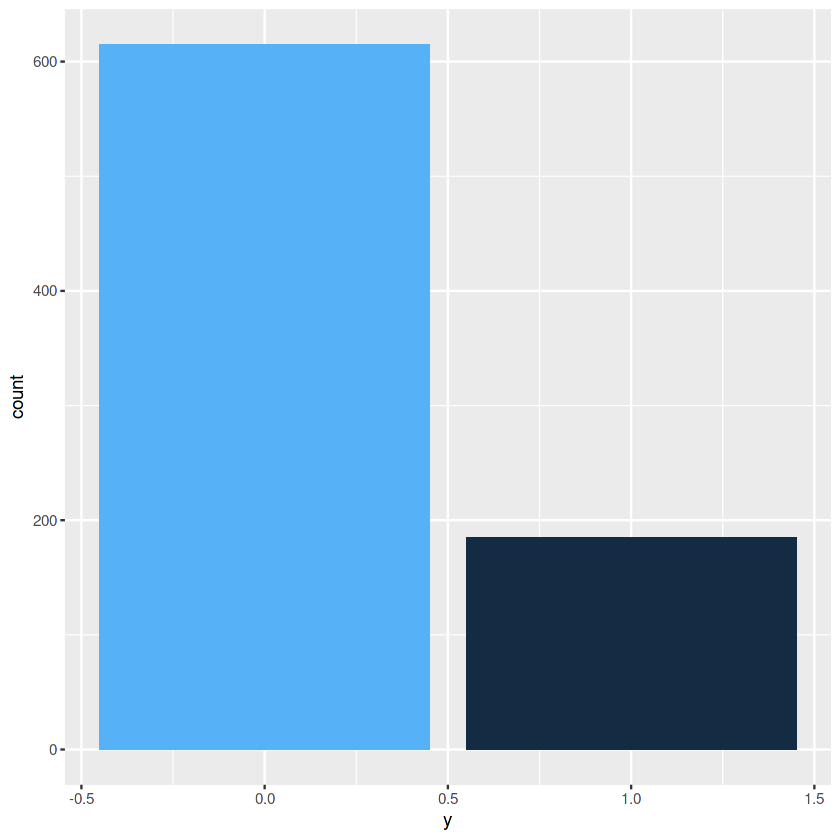

In [8]:
#Target variable analysis
yplot <- ggplot(data = autism_train) +
geom_bar(aes(x = y, y = ..count.., fill = ..count..)) +
scale_y_continuous() + 
theme(legend.position = "none")
yplot

The data is highly imbalanced - resample.

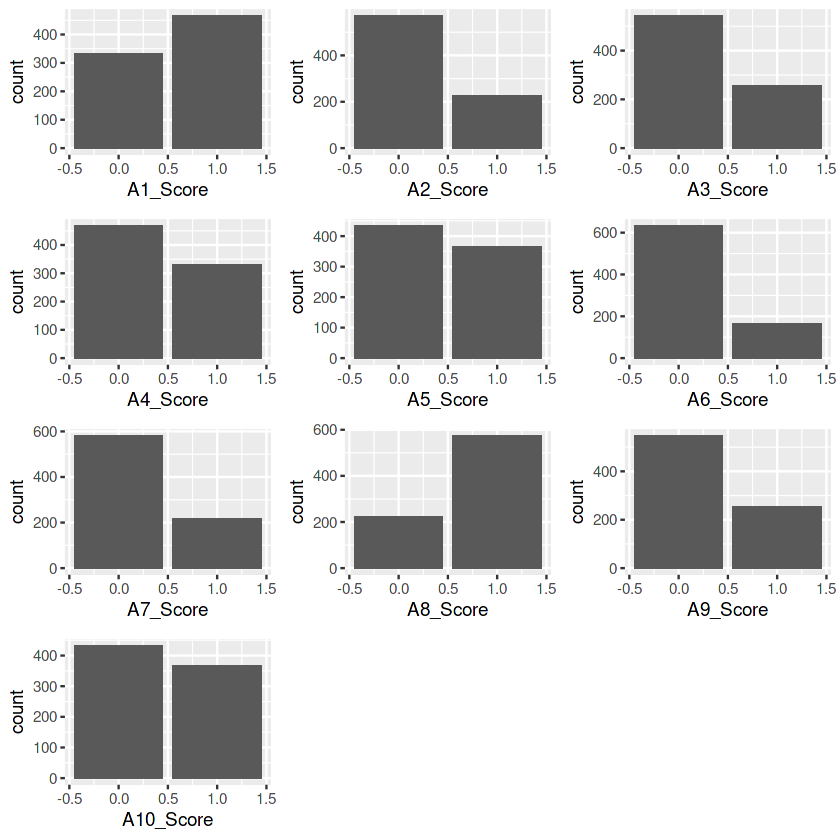

In [9]:
#Binary question results
a1plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A1_Score)) 

a2plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A2_Score)) 

a3plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A3_Score))

a4plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A4_Score))

a5plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A5_Score))

a6plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A6_Score))

a7plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A7_Score))

a8plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A8_Score))

a9plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A9_Score))

a10plot <- ggplot(data = autism_train) +
geom_bar(aes(x = A10_Score))

grid.arrange(a1plot,a2plot, a3plot, a4plot, a5plot, a6plot, a7plot, a8plot, a9plot, a10plot)

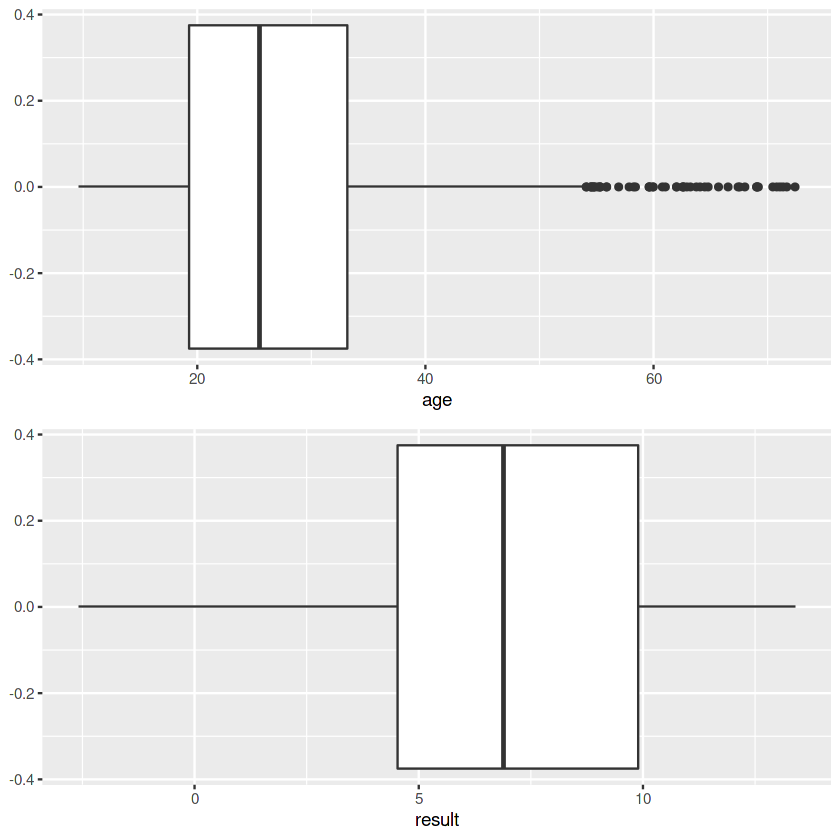

In [10]:
#Other numerical columns
ageplot <- ggplot(data = autism_train) +
geom_boxplot(aes(x = age))

resultplot <- ggplot(data = autism_train) +
geom_boxplot(aes(x = result))

grid.arrange(ageplot,resultplot)

Age has a number of outliers - test whether excluding them delivers better results.

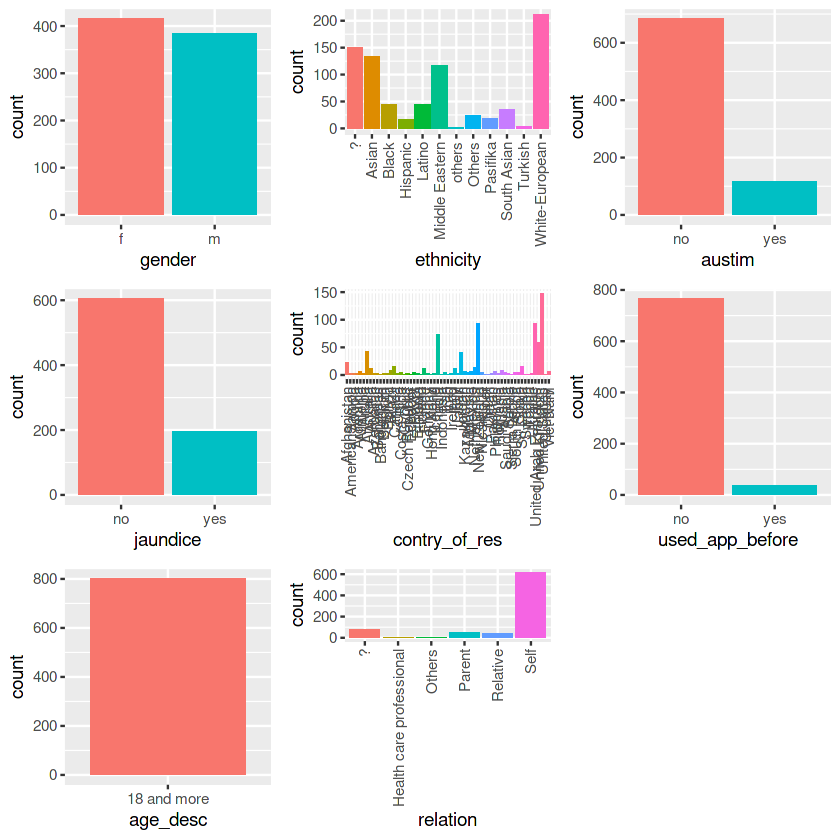

In [11]:
#Categorical variables

genderplot <- ggplot(data = autism_train) +
geom_bar(aes(x = gender, fill = gender)) +
scale_fill_discrete() +
theme(legend.position = 'none')

ethnicityplot <- ggplot(data = autism_train) +
geom_bar(aes(x = ethnicity, y = ..count.., fill = ethnicity))  +
scale_fill_discrete() +
theme(legend.position = 'none') +
scale_x_discrete(guide = guide_axis(angle = 90))

austimplot <- ggplot(data = autism_train) +
geom_bar(aes(x = austim, fill = austim))  +
scale_fill_discrete() +
theme(legend.position = 'none')

jaundiceplot <- ggplot(data = autism_train) +
geom_bar(aes(x = jaundice, fill = jaundice))  +
scale_fill_discrete() +
theme(legend.position = 'none')

countryplot <- ggplot(data = autism_train) +
geom_bar(aes(x = contry_of_res, fill = contry_of_res))  +
scale_fill_discrete() +
theme(legend.position = 'none') +
scale_x_discrete(guide = guide_axis(angle = 90))

appplot <- ggplot(data = autism_train) +
geom_bar(aes(x = used_app_before, fill = used_app_before))  +
scale_fill_discrete() +
theme(legend.position = 'none')

ageplot <- ggplot(data = autism_train) +
geom_bar(aes(x = age_desc, fill = age_desc)) +
scale_fill_discrete() +
theme(legend.position = 'none')

relationplot <- ggplot(data = autism_train) +
geom_bar(aes(x = relation, fill = relation)) +
scale_fill_discrete() +
theme(legend.position = 'none') +
scale_x_discrete(guide = guide_axis(angle = 90))

grid.arrange(genderplot, ethnicityplot, austimplot, jaundiceplot, countryplot, appplot, ageplot, relationplot)

Age_desc only has one option so provides no additional information - should be removed in pre-processing.  Need to check ethnicity, contry_of_res for duplicate values with spelling errors as too difficult to review on the graph.

In [12]:
#Confirm the list of categories for dimensions with a lot of unique values
count(autism_train, contry_of_res)

contry_of_res,n
<chr>,<int>
Afghanistan,23
AmericanSamoa,2
Angola,2
Argentina,2
Armenia,6
Aruba,3
Australia,43
Austria,12
Azerbaijan,2


In [13]:
count(autism_train, ethnicity)

ethnicity,n
<chr>,<int>
?,151
Asian,134
Black,45
Hispanic,16
Latino,44
Middle Eastern,116
others,2
Others,24
Pasifika,18


Others has 2 spellings, these should be combined in pre-processing. 

# Bivariate analysis

In [14]:
autism_train %>%
select(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score, age, result, y) %>%
cor()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,y
A1_Score,1.00000000,0.2445396,0.3164516,0.3220887,0.3500728,0.2914002,0.2014260,0.2400942,0.3086720,0.3084020,0.06883376,0.3199931,0.2899914
A2_Score,0.24453960,1.0000000,0.3875159,0.3590084,0.2954919,0.3619721,0.2624218,0.1946707,0.4018930,0.3421306,0.12066776,0.3402129,0.3807029
A3_Score,0.31645157,0.3875159,1.0000000,0.5179996,0.4482510,0.4897243,0.3520900,0.2295244,0.5395345,0.4607271,0.18907649,0.4794376,0.5496184
A4_Score,0.32208873,0.3590084,0.5179996,1.0000000,0.5403422,0.4475348,0.3534145,0.2974675,0.5237668,0.4391798,0.18216544,0.5036380,0.5127924
A5_Score,0.35007282,0.2954919,0.4482510,0.5403422,1.0000000,0.4111520,0.3815682,0.2529895,0.4869786,0.4361715,0.12151054,0.5090912,0.4484732
A6_Score,0.29140015,0.3619721,0.4897243,0.4475348,0.4111520,1.0000000,0.3744464,0.2403171,0.5105237,0.4022337,0.14451072,0.4600651,0.5425877
A7_Score,0.20142597,0.2624218,0.3520900,0.3534145,0.3815682,0.3744464,1.0000000,0.1548467,0.4144225,0.3108315,0.18860362,0.3994337,0.3946598
A8_Score,0.24009424,0.1946707,0.2295244,0.2974675,0.2529895,0.2403171,0.1548467,1.0000000,0.2237374,0.2504611,0.11575385,0.2325927,0.2190339
A9_Score,0.30867202,0.4018930,0.5395345,0.5237668,0.4869786,0.5105237,0.4144225,0.2237374,1.0000000,0.4887585,0.20749317,0.5369076,0.5386879
A10_Score,0.30840201,0.3421306,0.4607271,0.4391798,0.4361715,0.4022337,0.3108315,0.2504611,0.4887585,1.0000000,0.10576219,0.4662463,0.4395874


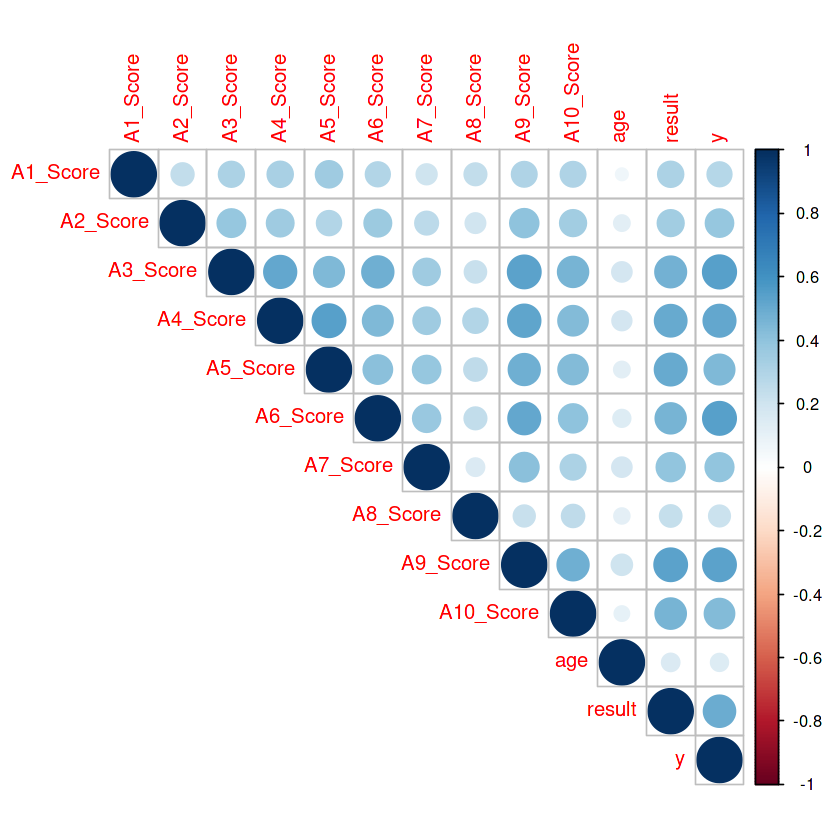

In [15]:
autism_train %>%
select(A1_Score, A2_Score, A3_Score, A4_Score, A5_Score, A6_Score, A7_Score, A8_Score, A9_Score, A10_Score, age, result, y) %>%
cor() %>%
corrplot(type = 'upper')

Unsurprsingly, y is correlated with result, but other questions seem to be related to y - A3, A6, and A9. 

# Actions required for preprocessing

* Remove age_desc as it provides no information.
* Combine 2 others categories in ethnicity.
* Encode the categorical variables.
* Test if removing the outliers for age make a difference to the performance of the model.
* Resample 